<a href="https://colab.research.google.com/github/MohammadErfanRashidi/House-Price-Prediction/blob/main/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.datasets import fetch_california_housing

# Importing Dataset

In [55]:
dataset = fetch_california_housing()

In [56]:
# Transfering the dataset to Panads
dataframe = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [57]:
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [58]:
# Adding the Target column to the dataset
dataframe['Price'] = dataset.target

In [59]:
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [60]:
# Cheking the shape
dataframe.shape

(20640, 9)

In [61]:
# Cheking missing values
dataframe.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
Price,0


In [62]:
# Measuring the dataframe
dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Checking the Correlation

In [63]:
correlation = dataframe.corr()

<Axes: >

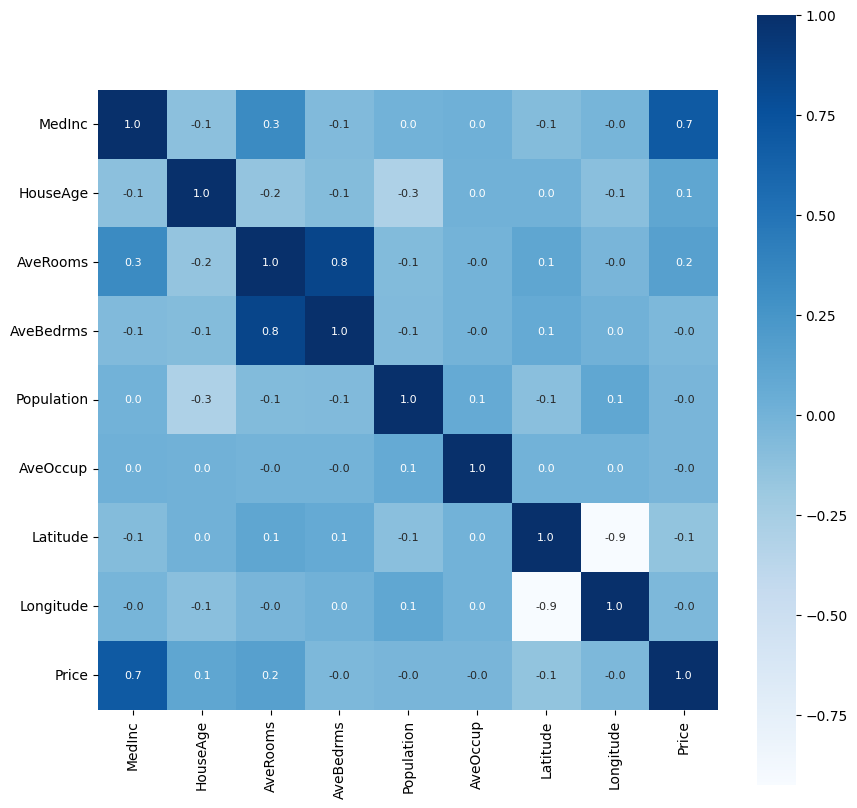

In [64]:
# The heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues')

# Seperating the Data and the Labels (Price)

In [65]:
X = dataframe.drop(['Price'], axis = 1)
Y = dataframe['Price']

In [66]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85    -122.25
...       ...       ...       ...        ...         ...       ...       ...        ...
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0  5.25471

# Train and Test

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

# Model Training

In [68]:
# Loading the model
model = XGBRegressor()

In [69]:
# X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Prediction on Training Data

In [70]:
prediction_data_train = model.predict(X_train)

# R squared error
score1_train = metrics.r2_score(Y_train, prediction_data_train)

# Mean absolute error
score2_train = metrics.mean_absolute_error(Y_train, prediction_data_train)

print(f"R squared error : {score1_train}")
print(f"Mean absolute error : {score2_train}")

R squared error : 0.943650140819218
Mean absolute error : 0.1933648700612105


# Prediction on Test Data

In [71]:
prediction_data_test = model.predict(X_test)

# R squared error
score1_test = metrics.r2_score(Y_test, prediction_data_test)

# Mean absolute error
score2_test = metrics.mean_absolute_error(Y_test, prediction_data_test)

print(f"R squared error : {score1_test}")
print(f"Mean absolute error : {score2_test}")

R squared error : 0.8338000331788725
Mean absolute error : 0.3108631800268186


# Predicted Vs. Actual price visualization

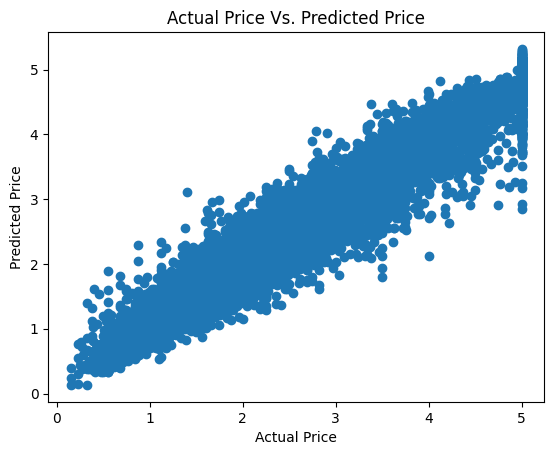

In [72]:
# Training data
plt.scatter(Y_train, prediction_data_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs. Predicted Price")
plt.show()

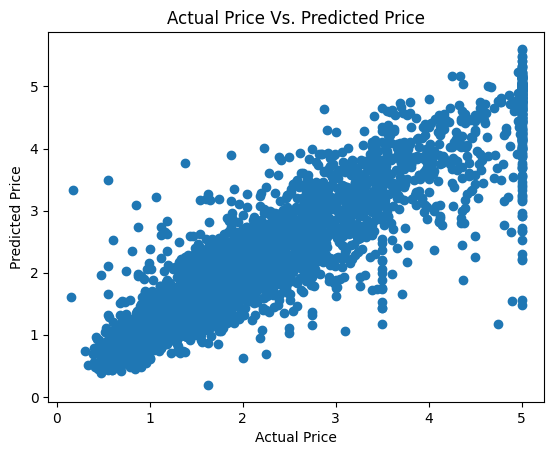

In [73]:
# Test data
plt.scatter(Y_test, prediction_data_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price Vs. Predicted Price")
plt.show()